<h1 align="center">Check Questions (15%)</h1> 

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма ЭСС при изменении параметра $\alpha$ от 0 до 1.

   Чем меньше $\alpha$, тем больше значение $(1-\alpha)*l_t$, где $l_t$ предыдущее предсказывание, а значит предсказания станут стационарными (гладкими, почти неизмененными). А чем больше $\alpha$, тем больше предсказания будут повторять временной ряд ($\alpha*y_t$, где $y_t$ значение из ряда).

**Вопрос 2**: Каким следует выбрать параметр сглаживания тренда $\alpha_2$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

В 1) $\alpha_2$ должна быть ближа к 0, так как зависеть будет от предыдущего тренда (от $b_t$), а в 2) ближе к 1, тогда зависеть будет от разницы предыдущих предсказаний ($l_t- l_{t-1})$)

**Вопрос 3**: Докажите  эквивалетность формул расчёта (в рекуррентной форме и в форме корректировки прогноза (correction error form) )скрытых компонент временного ряда в модели Тейла-Вейджа (период сезонность обозначается $p$):
$$l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} ) \color{red}{=} l_{t-1} + b_{t-1} + \alpha e_t;$$,
    $$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} \color{red}{=} b_{t-1} + \alpha\beta e_t;$$,
    $$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} \color{red}{=} s_{t-p} + \gamma(1-\alpha)e_t.$$,


По определению $e_t=y_t - s_{t-p}-l_{t-1}-b_{t-1}$ ,тогда 

$ 1) l_t \color{red} {=} l_{t-1} + b_{t-1} + \alpha e_t = l_{t-1} + b_{t-1} + \alpha (y_t  - s_{t-p}-l_{t-1}-b_{t-1}) \color{red} {=} \alpha (y_t  - s_{t-p}) + (1-\alpha)(l_{t-1} + b_{t-1} )$

$ 2) $ из предыдущего получим что  $\alpha e_t=l_t-l_{t-1}-b_{t-1}$ 

$  b_t \color{red} {=} b_{t-1} + \alpha\beta e_t = b_{t-1} + \beta(l_t-l_{t-1}-b_{t-1}) \color{red} {=} (1-\beta)b_{t-1} + \beta (l_{t} - l_{t-1} )$

$3)$ аналогично получим $\gamma (1-\alpha) e_t=\gamma (y_t-l_t-s_{t-p})$ 

$ s_t \color{red} {=} \gamma (y_t-l_t) + (1-\gamma) s_{t-p} \color{red}{=} s_{t-p} + \gamma(1-\alpha)e_t$


**Вопрос 4**: Выведите формулу расчёта скрытых компонент в форме корректировки прогноза (correction error form) временного ряда в модели ЭС с линейным затухающим трендом (WS with additive damped trend):

$$\hat{y}_{t+d|t} = l_t + \left(\phi + \phi^2 + \dots + \phi^{d}\right) b_t.$$,
   
Скрытые компоненты ВР согласно модели в рекуррентной форме записываются:
    $$ l_{t}       = \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right),$$,
    $$ b_t         = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}.$$


<Ответ>

<h1 align="center"> Practice</h1>
#  1. reading data (5%)

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)

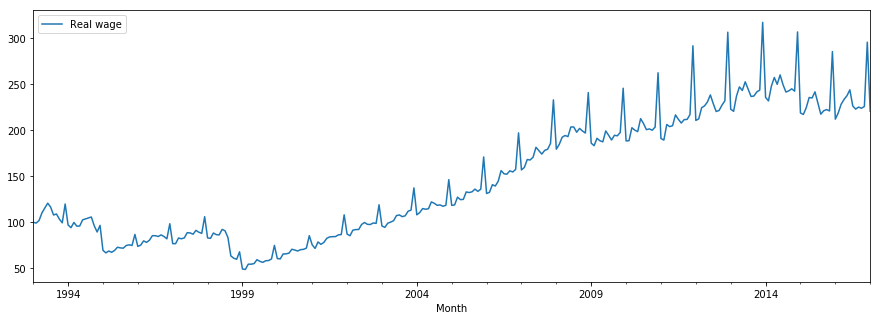

In [49]:
# start with this code
import pandas as pd
import numpy as np
import math
from utils import InitExponentialSmoothing, BuildForecast, plotTSForecast
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE 

%matplotlib inline


wage = pd.read_csv('monthly-wage.csv', sep=';', decimal='.', index_col=0, parse_dates=True, dayfirst=False)

# Put your code below
wage.plot(figsize=(15,5))


# 2. Build the Forecast with  IES (5%)

You need to apply IES model (see seminar 1) for the TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.


* 0) Forecast Wage TS with SES $\alpha=.1$.
* 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You 
can choose any loss function above).
* 2) Draw the forecast that correspond to IES with optimial value $\alpha$ (use time steps from 09.1998 to 01.2017.)
     Conclude whether IES can be used for this TS? If can not than explain why.
* 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]. (You can choose any Loss function from seminar 1).

## 1) Search for the optimal $\alpha$ 

In [50]:
ALPHA = np.linspace(0.01,0.99,99)
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod':10} for alpha in ALPHA]
FRC_WAGE = BuildForecast(h=1, AlgName =  'InitExponentialSmoothing', AlgTitle='IES',ParamsArray = ESParamsArray, ts=wage)

In [51]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1993-01':'2017-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

IES {'alpha': 0.44, 'AdaptationPeriod': 10}                    0.059568
IES {'alpha': 0.42999999999999999, 'AdaptationPeriod': 10}     0.059586
IES {'alpha': 0.45000000000000001, 'AdaptationPeriod': 10}     0.059592
IES {'alpha': 0.42000000000000004, 'AdaptationPeriod': 10}     0.059618
IES {'alpha': 0.46000000000000002, 'AdaptationPeriod': 10}     0.059621
IES {'alpha': 0.41000000000000003, 'AdaptationPeriod': 10}     0.059664
IES {'alpha': 0.47000000000000003, 'AdaptationPeriod': 10}     0.059665
IES {'alpha': 0.48000000000000004, 'AdaptationPeriod': 10}     0.059709
IES {'alpha': 0.40000000000000002, 'AdaptationPeriod': 10}     0.059717
IES {'alpha': 0.48999999999999999, 'AdaptationPeriod': 10}     0.059752
IES {'alpha': 0.39000000000000001, 'AdaptationPeriod': 10}     0.059776
IES {'alpha': 0.5, 'AdaptationPeriod': 10}                     0.059795
IES {'alpha': 0.51000000000000001, 'AdaptationPeriod': 10}     0.059840
IES {'alpha': 0.38, 'AdaptationPeriod': 10}                    0

## 2) draw the forecast with optimial value $\alpha $

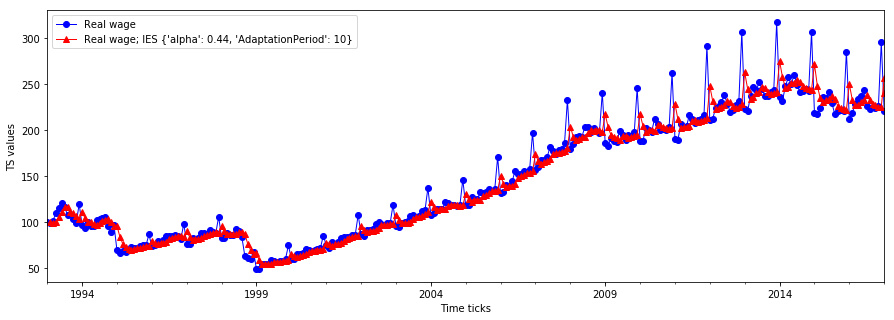

In [52]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1993-01':'2017-01'], FRC_WAGE[algName].loc['1993-01':'2017-01']
               , ts_num=0, alg_title=algName)

** Question**
    * Does SES follow to the TS components?
** Answer**
    Да, следует.

## 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [53]:
qualityMACAPE(wage.loc['2015-02':'2017-01'], FRC_WAGE[algName].loc['2015-02':'2017-01'])[0]

Real wage    0.063361
dtype: float64

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of IES: is it better? 
* 5) Conclude whether Winter's ES can be used for this TS?

In [54]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    if delta>1:
        w.warn('Delta can not be more than 1')
        #beta = 1
        return FORECAST
    if delta<0:
        w.warn('Delta can not be less than 0')
        #beta = 0
        return FORECAST
    
    l= np.NaN
    s= np.array([np.NaN for i in range(p)]) 
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr]
            prev_l=l
            l = alpha*(x[cntr]-s[cntr % p - p])+(1-alpha)*prev_l
            prev_s=s[cntr % p]
            s[cntr % p] = delta*(x[cntr]-prev_l)+(1-delta)*prev_s
            
        FORECAST[cntr+h] = l + s[cntr % p]
    return FORECAST

In [55]:
def BuildForecast(h, ts, AlgName, AlgTitle, ParamsArray, step='D'):
	FRC_TS = dict()
	for p in ParamsArray:
		frc_horizon = pd.date_range(ts.index[-1], periods=h+1, freq=step)[1:]
		frc_ts = pd.DataFrame(index = ts.index.append(frc_horizon), columns = ts.columns)
		
		for cntr in ts.columns:
			frc_ts[cntr] = eval(AlgName)(ts[cntr], h, p)
		
#         frc_ts.columns = frc_ts.columns+('%s %s' % (AlgTitle, p))
		FRC_TS['%s %s' % (AlgTitle, p)] = frc_ts
	return FRC_TS

In [56]:
ALPHA = np.linspace(0.1,1,10)
DELTA = np.linspace(0.1,1,10)
WintersParamsArray = [{'alpha':alpha, 'delta':delta, 'seasonality_period':12} for alpha in ALPHA for delta in DELTA]
FRC_WAGE = BuildForecast(h=1, ts=wage.loc['1998-09':'2015-01'], AlgName = 'WintersExponentialSmoothing', AlgTitle='Winters'
                              ,ParamsArray = WintersParamsArray, step='12MS')

QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())
ix = wage.loc['1998-09':'2015-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()[:5]


Winters {'alpha': 0.59999999999999998, 'seasonality_period': 12, 'delta': 0.10000000000000001}    0.061121
Winters {'alpha': 0.70000000000000007, 'seasonality_period': 12, 'delta': 0.10000000000000001}    0.061222
Winters {'alpha': 0.5, 'seasonality_period': 12, 'delta': 0.10000000000000001}                    0.061453
Winters {'alpha': 0.80000000000000004, 'seasonality_period': 12, 'delta': 0.10000000000000001}    0.061583
Winters {'alpha': 0.70000000000000007, 'seasonality_period': 12, 'delta': 0.20000000000000001}    0.062032
dtype: float64

MACAPE: Real wage    0.05456
dtype: float64


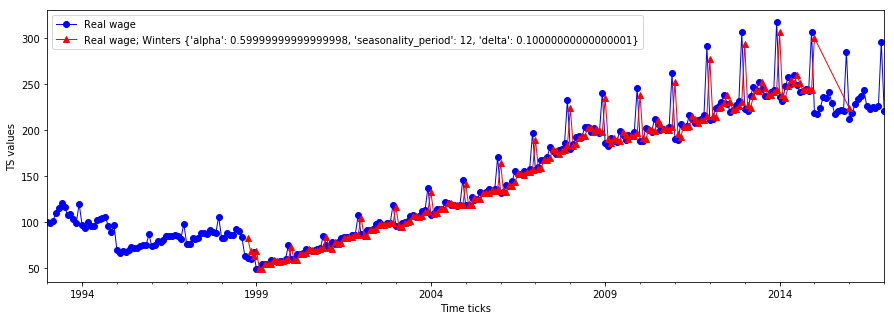

In [57]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage, FRC_WAGE[algName].loc['1998-09':'2017-01']
               , ts_num=0, alg_title=algName)
print('MACAPE: %s' % qualityMACAPE(wage.loc['2015-02':'2017-01'], FRC_WAGE[algName].loc['2015-02':'2017-01'])[0])

### Оценка у WintersES лучше по сравнению с IES (0.05456 против 0.063361)

# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [61]:
def Theil_WageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    if beta>1:
        w.warn('Beta can not be more than 1')
        #beta = 1
        return FORECAST
    if beta<0:
        w.warn('Belta can not be less than 0')
        #beta = 0
        return FORECAST
    if gamma>1:
        w.warn('Gamma can not be more than 1')
        #alpha = 1
        return FORECAST
    if gamma<0:
        w.warn('Gamma can not be less than 0')
        #alpha = 0
        return FORECAST
    
    l= np.NaN
    b=np.NaN
    s= np.array([np.NaN for i in range(p)]) 
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
            
            if math.isnan(b):
                b= x[cntr]
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr]
            prev_l=l
            l = alpha*(x[cntr]-s[cntr % p])+(1-alpha)*(prev_l+b)
            prev_b=b
            b = beta*(l-prev_l)+(1-beta)*prev_b
            prev_s=s[cntr % p]
            s[cntr % p] = gamma*(x[cntr]-l)+(1-gamma)*prev_s
            
        FORECAST[cntr+h] = (l+b*h) + s[cntr % p]
    return FORECAST

In [64]:
ALPHA = np.linspace(0.1,1,10)
BETA = np.linspace(0.1,1,10)
GAMMA = np.linspace(0.1,1,10)
Theil_WageParamsArray = [{'alpha':alpha, 'beta':beta, 'gamma':gamma, 'seasonality_period':1} for alpha in ALPHA for beta in BETA for gamma in GAMMA]
FRC_WAGE = BuildForecast(h=1, ts=wage.loc['1998-09':'2015-01'], AlgName = 'Theil_WageExponentialSmoothing', AlgTitle='Theil_Wage'
                              ,ParamsArray = Theil_WageParamsArray, step='12MS')

QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())
ix = wage.loc['1998-09':'2015-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()[:5]


Theil_Wage {'alpha': 0.59999999999999998, 'beta': 0.5, 'seasonality_period': 1, 'gamma': 0.80000000000000004}                    0.072895
Theil_Wage {'alpha': 0.80000000000000004, 'beta': 0.40000000000000002, 'seasonality_period': 1, 'gamma': 0.59999999999999998}    0.072919
Theil_Wage {'alpha': 0.30000000000000004, 'beta': 1.0, 'seasonality_period': 1, 'gamma': 0.90000000000000002}                    0.072968
Theil_Wage {'alpha': 0.5, 'beta': 0.59999999999999998, 'seasonality_period': 1, 'gamma': 0.80000000000000004}                    0.072973
Theil_Wage {'alpha': 0.70000000000000007, 'beta': 0.40000000000000002, 'seasonality_period': 1, 'gamma': 0.70000000000000007}    0.073064
dtype: float64

MACAPE: Real wage    0.013438
dtype: float64


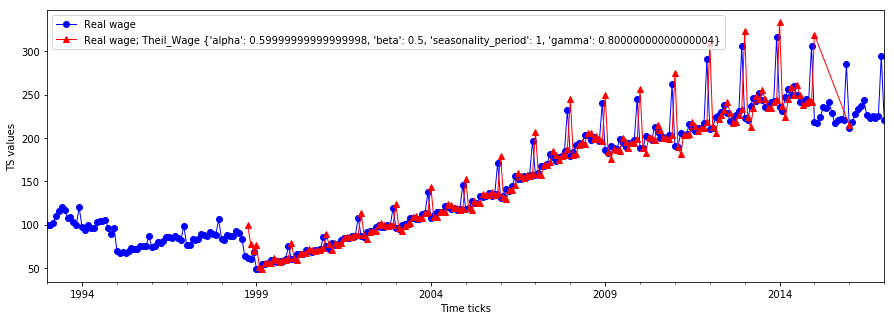

In [65]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage, FRC_WAGE[algName].loc['1998-09':'2017-01']
               , ts_num=0, alg_title=algName)
print('MACAPE: %s' % qualityMACAPE(wage.loc['2015-02':'2017-01'], FRC_WAGE[algName].loc['2015-02':'2017-01'])[0])

### Оценка Theil_Wage еще лучше предыдущей - 0.013438

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it by expert opinion (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diveret

In [66]:
def AMExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    if beta>1:
        w.warn('Beta can not be more than 1')
        #beta = 1
        return FORECAST
    if beta<0:
        w.warn('Belta can not be less than 0')
        #beta = 0
        return FORECAST
    if gamma>1:
        w.warn('Gamma can not be more than 1')
        #alpha = 1
        return FORECAST
    if gamma<0:
        w.warn('Gamma can not be less than 0')
        #alpha = 0
        return FORECAST
    
    l= np.NaN
    b=np.NaN
    s= np.array([np.NaN for i in range(p)]) 
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
            
            if math.isnan(b):
                b= x[cntr]
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr]
            prev_l=l
            l = alpha*(x[cntr]/s[cntr % p])+(1-alpha)*(prev_l+b)
            prev_b=b
            b = beta*(l-prev_l)+(1-beta)*prev_b
            prev_s=s[cntr % p]
            s[cntr % p] = gamma*(x[cntr]/l)+(1-gamma)*prev_s
            
        FORECAST[cntr+h] = (l+b*h)*s[cntr % p]
    return FORECAST

In [67]:
ALPHA = np.linspace(0.1,1,10)
BETA = np.linspace(0.1,1,10)
GAMMA = np.linspace(0.1,1,10)
AMParamsArray = [{'alpha':alpha, 'beta':beta, 'gamma':gamma, 'seasonality_period':1} for alpha in ALPHA for beta in BETA for gamma in GAMMA]
FRC_WAGE = BuildForecast(h=1, ts=wage.loc['1998-09':'2015-01'], AlgName = 'AMExponentialSmoothing', AlgTitle='AM'
                              ,ParamsArray = AMParamsArray, step='12MS')

QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())
ix = wage.loc['1998-09':'2015-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()[:5]


AM {'alpha': 0.80000000000000004, 'beta': 0.70000000000000007, 'seasonality_period': 1, 'gamma': 0.80000000000000004}   -5.560276
AM {'alpha': 0.20000000000000001, 'beta': 0.70000000000000007, 'seasonality_period': 1, 'gamma': 0.40000000000000002}   -1.479598
AM {'alpha': 0.5, 'beta': 0.80000000000000004, 'seasonality_period': 1, 'gamma': 0.59999999999999998}                   -1.405536
AM {'alpha': 0.30000000000000004, 'beta': 0.70000000000000007, 'seasonality_period': 1, 'gamma': 0.40000000000000002}   -1.297750
AM {'alpha': 0.80000000000000004, 'beta': 0.5, 'seasonality_period': 1, 'gamma': 0.20000000000000001}                   -1.271730
dtype: float64

MACAPE: Real wage    0.086244
dtype: float64


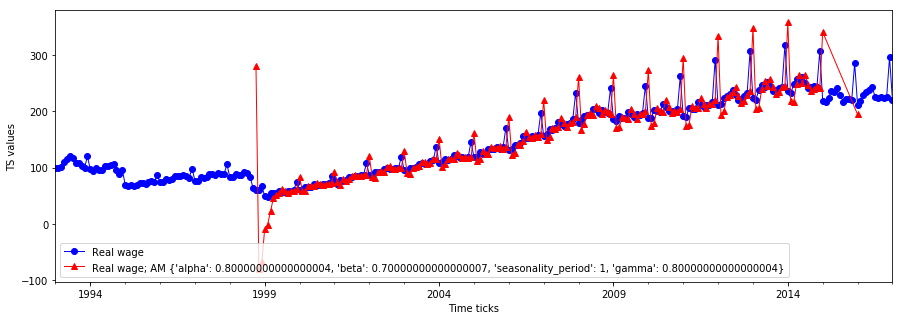

In [68]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage, FRC_WAGE[algName].loc['1998-09':'2017-01']
               , ts_num=0, alg_title=algName)
print('MACAPE: %s' % qualityMACAPE(wage.loc['2015-02':'2017-01'], FRC_WAGE[algName].loc['2015-02':'2017-01'])[0])

### Оценка у ES(A,M) намного хуже всех предыдущих - 0.086244